# コンペティションの目的
- 与えられた地域の月次マイクロビジネス密度を予測すること。
- 月次マイクロビジネス密度は、ある地域において1か月あたりのマイクロビジネスの数を表す指標。
- マイクロビジネスは、一般的に従業員数が10人以下で、オンライン上に存在する小規模な事業のこと。

# データセット概要

## train.csv
- row_id: 行のIDコード
- cfips: 米国の郡を識別するための一意の識別子
- county_name: 郡の名称
- state_name: 州の名称
- first_day_of_month: 月の最初の日付
- microbusiness_density: 指定された郡の18歳以上の人口100人あたりのマイクロビジネス数
- active: 郡内のマイクロビジネスの生データ(テストセットでは提供されない)

## sample_submission.csv
- row_id: 行のIDコード
- microbusiness_density: ターゲット変数

## test.csv
- row_id: 行のIDコード
- cfips: 米国の郡を識別するための一意の識別子
- first_day_of_month: 月の最初の日付

## census_starter.csv
- pct_bb_[year]: 郡内のインターネット接続を持つ世帯の割合
- cfips: CFIPSコード
- pct_college_[year]: 25歳以上の人口のうち、4年制大学の学位を持っている割合
- pct_foreign_born_[year]: 米国以外で生まれた郡内の人口の割合
- pct_it_workers_[year]: 郡内で情報関連産業に従事する労働者の割合
- median_hh_inc_[year]: 郡内の世帯収入の中央値

# Read Data

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
train_data = pd.read_csv("../input/godaddy-microbusiness-density-forecasting/train.csv")
test_data = pd.read_csv("../input/godaddy-microbusiness-density-forecasting/test.csv")
sample_data = pd.read_csv("../input/godaddy-microbusiness-density-forecasting/sample_submission.csv")
census_data = pd.read_csv("../input/godaddy-microbusiness-density-forecasting/census_starter.csv")

In [149]:
train_data.tail()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100
122264,56045_2022-10-01,56045,Weston County,Wyoming,2022-10-01,1.785395,100


In [150]:
test_data.tail()

,row_id,cfips,first_day_of_month
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01
25079,56045_2023-06-01,56045,2023-06-01


In [151]:
sample_data.tail()

,row_id,microbusiness_density
25075,56037_2023-06-01,3.817671
25076,56039_2023-06-01,3.817671
25077,56041_2023-06-01,3.817671
25078,56043_2023-06-01,3.817671
25079,56045_2023-06-01,3.817671


In [152]:
census_data.tail()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
3141,71.1,73.3,76.8,79.7,81.3,56045,14.1,13.5,13.4,12.7,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


# Check Data

## ターゲット

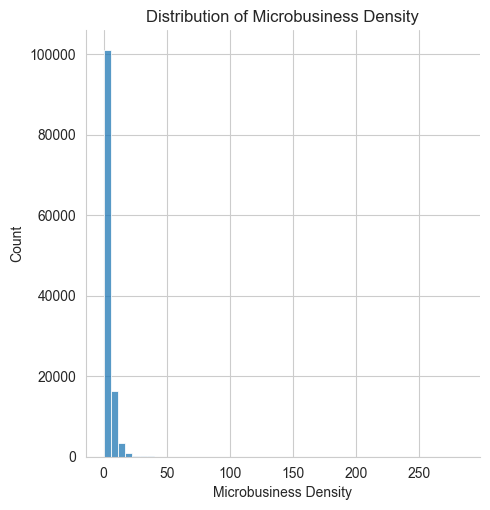

In [153]:
# ターゲット変数の分布を表示
sns.displot(data=train_data, x='microbusiness_density', bins=50)
sns.set_style('whitegrid')
plt.title('Distribution of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Count')
plt.show()

/Users/yuhi-sa/.anyenv/envs/pyenv/versions/3.10.4/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


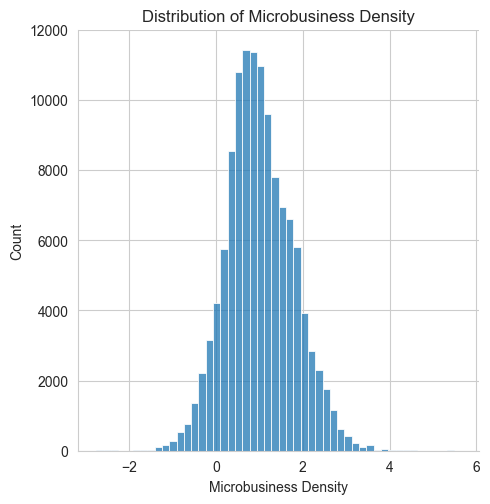

In [154]:
# 対数変換を行う
train_data['microbusiness_density'] = np.log(train_data['microbusiness_density'])

# -inf を NaN に変換する
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN を削除する
train_data.dropna(inplace=True)

# ターゲット変数の分布を表示
sns.displot(data=train_data, x='microbusiness_density', bins=50)
sns.set_style('whitegrid')
plt.title('Distribution of Microbusiness Density')
plt.xlabel('Microbusiness Density')
plt.ylabel('Count')
plt.show()

## カテゴリデータ

<Axes: xlabel='cfips', ylabel='Count'>

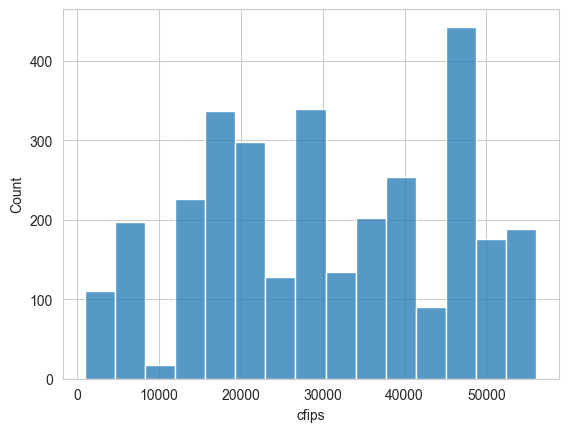

In [155]:
sns.histplot(data=census_data, x='cfips')

<Axes: xlabel='first_day_of_month', ylabel='Count'>

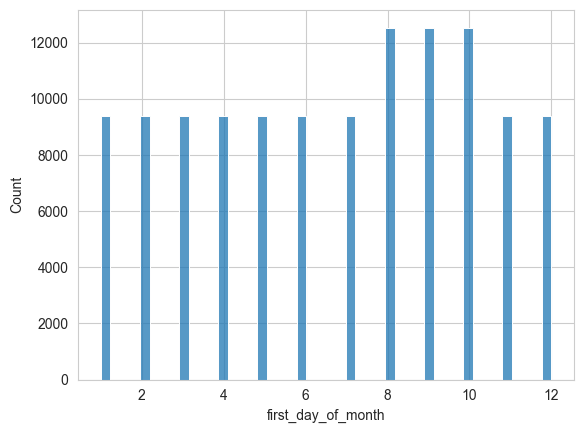

In [156]:
train_data['first_day_of_month'] = pd.to_datetime(train_data['first_day_of_month']).dt.month
test_data['first_day_of_month'] = pd.to_datetime(test_data['first_day_of_month']).dt.month

sns.histplot(data=train_data, x='first_day_of_month')

## 時系列データ

In [157]:
from sklearn.preprocessing import PowerTransformer

# 正規化関数
def normalize_columns(df, columns):
    pt = PowerTransformer(method='yeo-johnson')
    df[columns] = pt.fit_transform(df[columns])
    return df

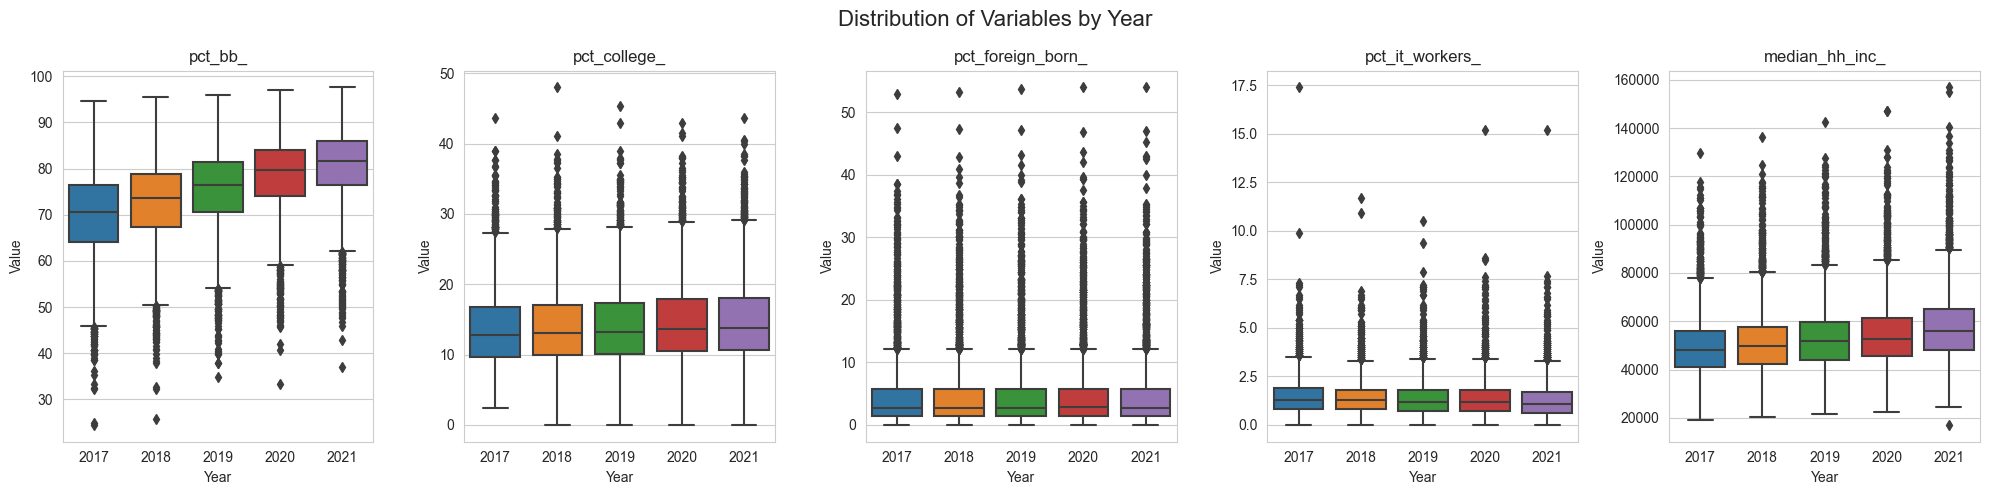

In [158]:
# 年ごとの分布を箱ひげ図で確認
variables = ["pct_bb_", "pct_college_", "pct_foreign_born_", "pct_it_workers_", "median_hh_inc_"]
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))
fig.suptitle('Distribution of Variables by Year', fontsize=16)

for i, variable in enumerate(variables):
    data = census_data.filter(regex=(variable+"\d+"))
    sns.boxplot(data=data, ax=axs[i])
    axs[i].set_title(variable)
    axs[i].set(xlabel="Year", ylabel="Value")
    axs[i].set_xticklabels([col[-4:] for col in data.columns])

plt.tight_layout()
plt.show()

/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/2466787107.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_data[col + '_diff'], ax=axs[i])
/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/2466787107.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c

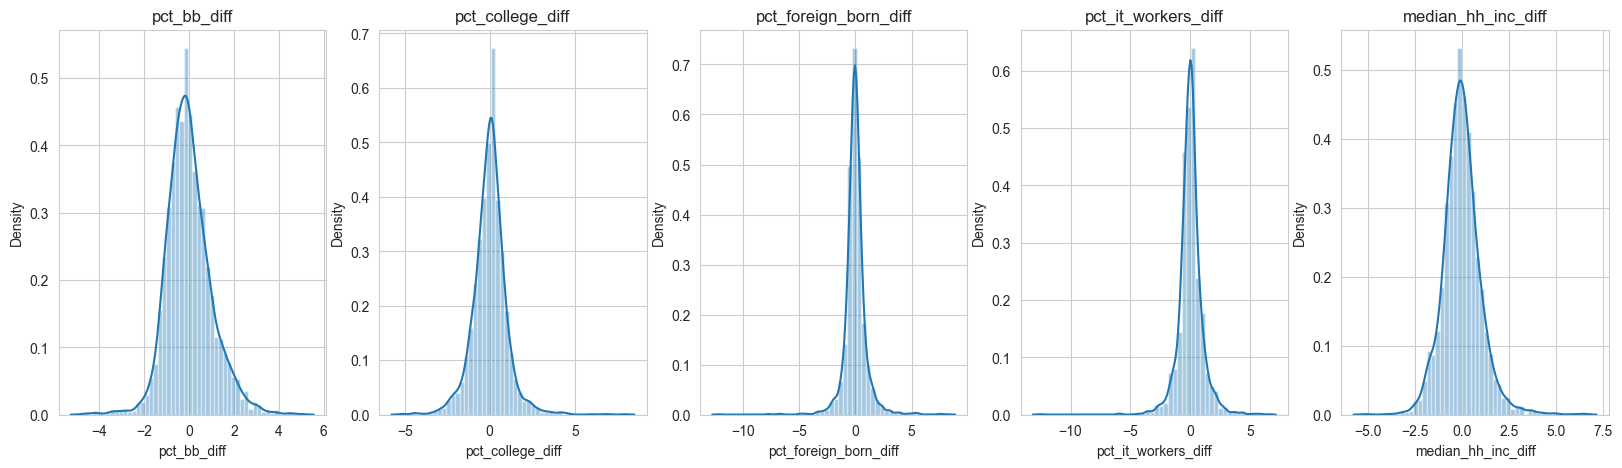

In [159]:
# 項目ごとに2017と2021の差分を説明変数とする
cols = ['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']

for col in cols:
    census_data[col + '_diff'] = census_data[f"{col}_2021"] - census_data[f"{col}_2017"]

# 正規化
census_data = normalize_columns(census_data, [col + '_diff' for col in cols])

# 分布を表示
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.distplot(census_data[col + '_diff'], ax=axs[i])
    axs[i].set_title(col + '_diff')
plt.show()


/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/1279242607.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_data[col], ax=axs[i])
/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/1279242607.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_data

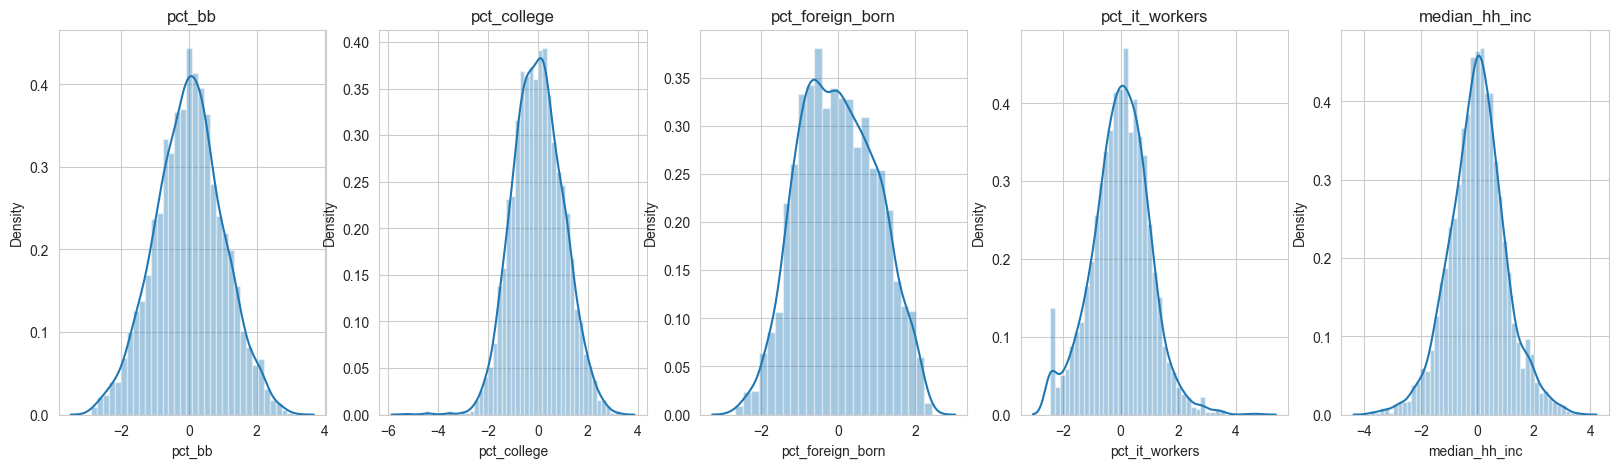

In [160]:
# 項目ごとに2017-2021の平均を説明変数とする
cols = ['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']

for col in cols:
    year_cols = [f"{col}_{year}" for year in range(2017, 2022)]
    col_mean = census_data[year_cols].mean(axis=1, skipna=True)
    census_data[col] = col_mean
    census_data = census_data.drop(columns=year_cols)

# データを正規化
census_data = normalize_columns(census_data, cols)

# 分布を表示
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.distplot(census_data[col], ax=axs[i])
    axs[i].set_title(col)
plt.show()

/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/2091789054.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_data[col], ax=axs[i])
/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/2091789054.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_data[c

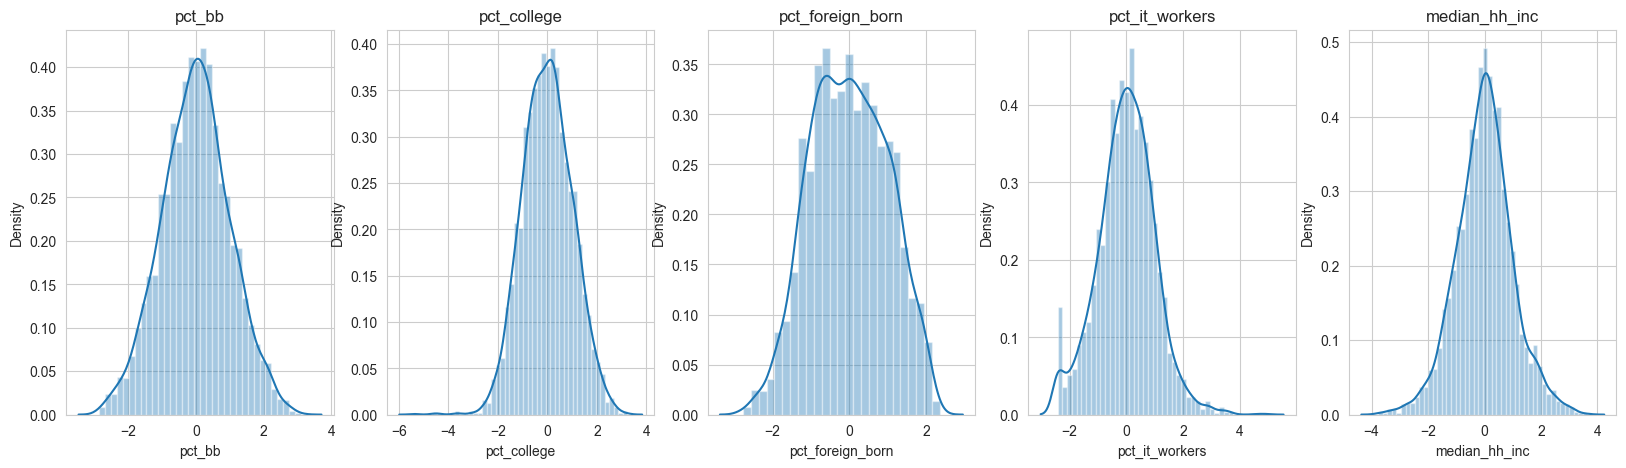

In [161]:
cols = ['pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc']

# データの正規化
census_data = normalize_columns(census_data, cols)   

# 分布を表示
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))
for i, col in enumerate(cols):
    sns.distplot(census_data[col], ax=axs[i])
    axs[i].set_title(col)
plt.show()

In [162]:
# データのマージ
train_data = train_data.merge(census_data, on='cfips')
test_data = test_data.merge(census_data, on='cfips')

In [163]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoderを作成
encoder = LabelEncoder()

# 各カテゴリに対してエンコードを適用
census_data['cfips'] = encoder.fit_transform(census_data['cfips'])
train_data['first_day_of_month'] = encoder.fit_transform(train_data['first_day_of_month'])
test_data['first_day_of_month'] = encoder.fit_transform(test_data['first_day_of_month'])

## 最終確認

/var/folders/89/cffytmz50wjbl3q6cf2bvvs00000gn/T/ipykernel_8215/3712763676.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap='coolwarm')


<Axes: >

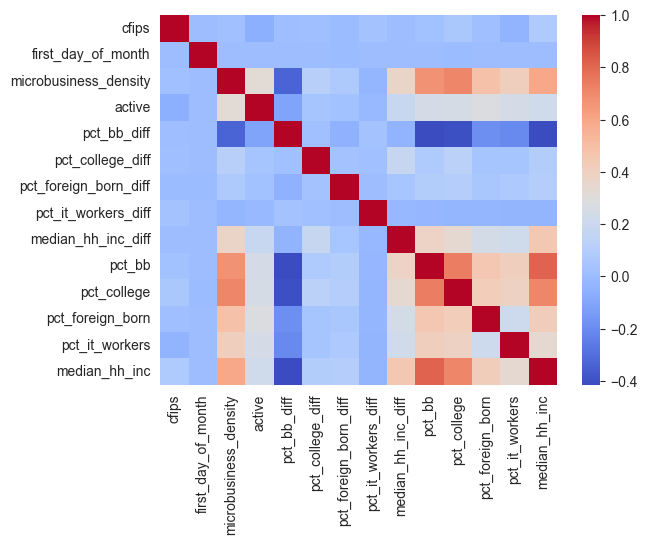

In [164]:
# ヒートマップで相関を可視化
sns.heatmap(train_data.corr(), cmap='coolwarm')

In [165]:
# 不要データ削除
train_data = train_data.drop(columns='row_id')
train_data = train_data.drop(columns='county')
train_data = train_data.drop(columns='state')
train_data = train_data.drop(columns='active')

<Axes: >

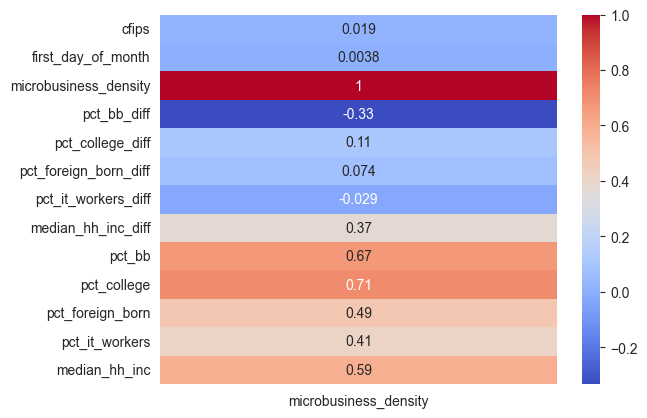

In [166]:
# microbusiness_density列と他の列との相関係数のみ取り出す
corr_with_target = train_data.corr()["microbusiness_density"]

# ヒートマップで相関を可視化
sns.heatmap(corr_with_target.to_frame(), cmap='coolwarm', annot=True)

In [167]:
# 相関の低い(0.1以下のデータ)を削除
train_data = train_data.drop(columns='cfips')
train_data = train_data.drop(columns='first_day_of_month')
train_data = train_data.drop(columns='pct_foreign_born_diff')
train_data = train_data.drop(columns='pct_it_workers_diff')

In [183]:
test_data = test_data.drop(columns='cfips')
test_data = test_data.drop(columns='first_day_of_month')
test_data = test_data.drop(columns='pct_foreign_born_diff')
test_data = test_data.drop(columns='pct_it_workers_diff')

<Axes: >

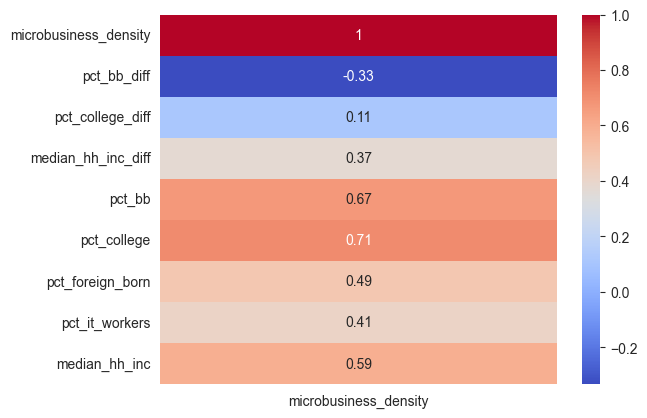

In [168]:
# microbusiness_density列と他の列との相関係数のみ取り出す
corr_with_target = train_data.corr()["microbusiness_density"]

# ヒートマップで相関を可視化
sns.heatmap(corr_with_target.to_frame(), cmap='coolwarm', annot=True)

In [169]:
# 欠損値の確認
train_data.isnull().sum()

microbusiness_density     0
pct_bb_diff               0
pct_college_diff          0
median_hh_inc_diff       34
pct_bb                    0
pct_college               0
pct_foreign_born          0
pct_it_workers            0
median_hh_inc             0
dtype: int64

In [170]:
test_data.isnull().sum()

row_id                   0
cfips                    0
first_day_of_month       0
pct_bb_diff              0
pct_college_diff         0
pct_foreign_born_diff    0
pct_it_workers_diff      0
median_hh_inc_diff       8
pct_bb                   0
pct_college              0
pct_foreign_born         0
pct_it_workers           0
median_hh_inc            0
dtype: int64

In [171]:
# 欠損値補完
train_data['median_hh_inc_diff'] = train_data['median_hh_inc_diff'].fillna(train_data['median_hh_inc_diff'].mean())
test_data['median_hh_inc_diff'] = train_data['median_hh_inc_diff'].fillna(test_data['median_hh_inc_diff'].mean())

# Train

In [172]:
train_data.tail()

,microbusiness_density,pct_bb_diff,pct_college_diff,median_hh_inc_diff,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
122234,0.58959,-0.090766,-0.630869,-0.528511,0.015918,0.027757,-0.023964,-1.747108,0.448995
122235,0.58959,-0.090766,-0.630869,-0.528511,0.015918,0.027757,-0.023964,-1.747108,0.448995
122236,0.57964,-0.090766,-0.630869,-0.528511,0.015918,0.027757,-0.023964,-1.747108,0.448995
122237,0.57964,-0.090766,-0.630869,-0.528511,0.015918,0.027757,-0.023964,-1.747108,0.448995
122238,0.57964,-0.090766,-0.630869,-0.528511,0.015918,0.027757,-0.023964,-1.747108,0.448995


In [173]:
test_data.tail()

,row_id,cfips,first_day_of_month,pct_bb_diff,pct_college_diff,pct_foreign_born_diff,pct_it_workers_diff,median_hh_inc_diff,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
25075,56045_2023-02-01,56045,1,-0.090766,-0.630869,-1.716609,-0.481817,-0.099018,0.015918,0.027757,-0.023964,-1.747108,0.448995
25076,56045_2023-03-01,56045,2,-0.090766,-0.630869,-1.716609,-0.481817,-0.099018,0.015918,0.027757,-0.023964,-1.747108,0.448995
25077,56045_2023-04-01,56045,3,-0.090766,-0.630869,-1.716609,-0.481817,-0.221383,0.015918,0.027757,-0.023964,-1.747108,0.448995
25078,56045_2023-05-01,56045,4,-0.090766,-0.630869,-1.716609,-0.481817,-0.221383,0.015918,0.027757,-0.023964,-1.747108,0.448995
25079,56045_2023-06-01,56045,5,-0.090766,-0.630869,-1.716609,-0.481817,-0.221383,0.015918,0.027757,-0.023964,-1.747108,0.448995


In [174]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [175]:
# 特徴量と目的変数を設定
X = train_data.drop(['microbusiness_density'], axis=1)
y = train_data['microbusiness_density']

# 訓練データと検証データに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# ハイパーパラメータ
lgbm_param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300]
}

xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

gbdt_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15]
}

In [177]:
# LightGBM
lgbm = LGBMRegressor(random_state=42)
lgbm_grid = GridSearchCV(estimator=lgbm, param_grid=lgbm_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [10, 20, 30]},
             scoring='neg_root_mean_squared_error')

In [178]:
# XGBoost
xgb = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [179]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [180]:
# Gradient Boosting Decision Tree
gbdt = GradientBoostingRegressor(random_state=42)
gbdt_grid = GridSearchCV(estimator=gbdt, param_grid=gbdt_param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
gbdt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [181]:
# 検証
lgbm_y_pred = lgbm_grid.predict(X_val)
lgbm_rmse = mean_squared_error(y_val, lgbm_y_pred, squared=False)
print("LightGBM RMSE on test data: ", lgbm_rmse)

xgb_y_pred = xgb_grid.predict(X_val)
xgb_rmse = mean_squared_error(y_val, xgb_y_pred, squared=False)
print("XGBoost RMSE on test data: ", xgb_rmse)

rf_y_pred = rf_grid.predict(X_val)
rf_rmse = mean_squared_error(y_val, rf_y_pred, squared=False)
print("Random Forest RMSE on test data: ", rf_rmse)

gbdt_y_pred = gbdt_grid.predict(X_val)
gbdt_rmse = mean_squared_error(y_val, gbdt_y_pred, squared=False)
print("Gradient Boosting Decision Tree RMSE on test data: ", gbdt_rmse)

LightGBM RMSE on test data:  0.15329953295797508
XGBoost RMSE on test data:  0.1310680091685619
Random Forest RMSE on test data:  0.399819189168199
Gradient Boosting Decision Tree RMSE on test data:  0.1313630318390932


# Predict

In [184]:
x_test = test_data.drop(columns='row_id')

lgbm_pred = lgbm_grid.predict(x_test)
xgb_pred = xgb_grid.predict(x_test)
rf_pred = rf_grid.predict(x_test)
gbdt_pred = gbdt_grid.predict(x_test)

predict = 0.3*lgbm_pred + 0.3*xgb_pred + 0.1*rf_pred + 0.3*gbdt_pred

# Submission

In [185]:
submission = pd.DataFrame({"row_id":test_data["row_id"],"microbusiness_density":np.exp(predict)})
# submission = pd.DataFrame({"row_id":test_data["row_id"],"microbusiness_density":predict})
submission.to_csv("submission.csv",index=False)